# Feature Selection ASG7:
This notebook contains the feature selection submission materials for Ian Feekes' submission of Module 7 USD MSAAI Machine Learning fundamentals class. 

Content here is performed after the initial data analysis portion of this work.

If the material in this submission does not meet requirements, please email me at ifeekes@sandiego.edu and I will gratefully and expediently remedy the situation. 

The material for this code should live in the repository here: https://github.com/USD-AAI/aai-510-01-su22-new-ianfeekes-sandiego/tree/main/Module_7

Thank you for taking the time to teach me and to evaluate my work!

#### Declare Global Variables

In [489]:
# Global Variables
debug = True

##### Read Data Frame

In [490]:
import pandas as pd                 # Used for data frame

data = pd.read_csv('dataset/application_train.csv')

##### Display High Correlation Variables

In [491]:
print("Top 30 Variables correlated with TARGET \n", '*'*100)
highCorrelations = data.corr()['TARGET'].abs().sort_values(ascending = False).head(30)[1:]
print(highCorrelations)

Top 30 Variables correlated with TARGET 
 ****************************************************************************************************
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_MODE                 0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
REGION_POPULATION_RELATIVE     0.037227
ELEVATORS_AVG                  0.034199
ELEVATORS_MEDI   

##### Removing Meaningless Continuous Variables

In [492]:
meaninglessContinuousVariables = ['NONLIVINGAPARTMENTS_AVG',
                                  'NONLIVINGAPARTMENTS_MODE',
                                  'NONLIVINGAPARTMENTS_MEDI',
                                  'NONLIVINGAREA_AVG',
                                  'NONLIVINGAREA_MODE',
                                  'NONLIVINGAREA_MEDI',
                                  'HOUR_APPR_PROCESS_START',
                                  'AMT_REQ_CREDIT_BUREAU_DAY',
                                  'AMT_REQ_CREDIT_BUREAU_WEEK',
                                  'AMT_REQ_CREDIT_BUREAU_MON',
                                  'AMT_REQ_CREDIT_BUREAU_QRT'
]

prevSize = len(data.columns)
data2 = data.drop(meaninglessContinuousVariables, axis = 1)

if debug == True:
    print(prevSize - data2.shape[1],"continuous variables removed from data frame")

11 continuous variables removed from data frame


##### Showing that None of the highly-correlated Continuous Variables have been Deleted

In [493]:
highCorrelations2 = data2.corr()['TARGET'].abs().sort_values(ascending = False).head(30)[1:]
print(highCorrelations2)

EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_MODE                 0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
REGION_POPULATION_RELATIVE     0.037227
ELEVATORS_AVG                  0.034199
ELEVATORS_MEDI                 0.033863
FLOORSMIN_AVG                  0.033614
FLOORSMIN_MEDI                 0.033394
LIVINGAREA_AVG                 0.032997


##### Removing Meaningless Categorical Variables

In [494]:
meaninglessCategoricalVariables = [
    'EMERGENCYSTATE_MODE',
    'FLAG_DOCUMENT_2',
    #'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'FLAG_EMAIL',
    'FLAG_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_WORK_PHONE',
    'HOUSETYPE_MODE',
    'WEEKDAY_APPR_PROCESS_START',
    'FLAG_MOBIL',
    'ORGANIZATION_TYPE',
    'CODE_GENDER'                 # Removed for ethical reasons
]

prevSize = len(data2.columns)
data2 = data.drop(meaninglessCategoricalVariables, axis = 1)

if debug == True:
    print(prevSize - data2.shape[1],"categorical variables removed from data frame")

18 categorical variables removed from data frame


In [495]:
data2.shape

(307511, 93)

In [496]:
lineString = "*"*80

# Initialize maps mapping variables with severity of particular category imbalances
mild = {}
moderate = {}
extreme = {}

# Function that given a data frame and emtpy maps for mild, moderate, and extreme
# will fill the maps with variable to category mappings for analysis purposes
def allocateSeverity(df, mild, moderate, extreme):
    for i in df.columns:
        # Ignore dropped columns
        if i not in data.columns: 
            continue
        # Get value counts data structure
        valueCounts = df[i].value_counts()
        # Extract category names into a variable for easier iteration
        categoryNames = valueCounts.index.tolist()
        for idx, category in enumerate(valueCounts):
            if category/sum(valueCounts) < .01:
                extreme[i] = valueCounts
            elif category/sum(valueCounts) < .2:
                moderate[i] = valueCounts
            elif category/sum(valueCounts) < .4:
                mild[i] = valueCounts

                
# Prints details on a value count for the category, number of occurences, and its % of the variable                
def printCategoryDetails(valueCount):
    categoryNames = valueCount.index.tolist()
    for idx, val in enumerate(valueCount):
        print(categoryNames[idx], val, " Weight on dataset: ", val/sum(valueCount))

# Calls helper function at top of the block to allocate mappings
allocateSeverity(data2.select_dtypes('object'), mild, moderate, extreme)
#allocateSeverity(data_strings, mild, moderate, extreme)

# Prints information from which categories are extreme, moderate, and mild with imbalances
if debug == True:
    print(len(extreme.keys()),"Extreme items: ")
    for key, value in extreme.items():
        print(lineString)
        print("Variable: ", key)
        printCategoryDetails(extreme[key])
    print("\n"*3)
    print(len(moderate.keys()),"Moderate items: ")
    for key, value in moderate.items():
        print(lineString)
        print("Variable: ", key)
        printCategoryDetails(moderate[key])
    print("\n"*3)
    print(len(mild.keys()), "Mild items: ")
    for key, value in mild.items():
        print(lineString)
        print("Variable: ", key)
        printCategoryDetails(mild[key])

6 Extreme items: 
********************************************************************************
Variable:  NAME_TYPE_SUITE
Unaccompanied 248526  Weight on dataset:  0.8115956227405876
Family 40149  Weight on dataset:  0.1311120472602941
Spouse, partner 11370  Weight on dataset:  0.03713028910681571
Children 3267  Weight on dataset:  0.010668835049425411
Other_B 1770  Weight on dataset:  0.005780176932195585
Other_A 866  Weight on dataset:  0.0028280413690855238
Group of people 271  Weight on dataset:  0.0008849875415960473
********************************************************************************
Variable:  NAME_INCOME_TYPE
Working 158774  Weight on dataset:  0.5163197414076245
Commercial associate 71617  Weight on dataset:  0.2328924818949566
Pensioner 55362  Weight on dataset:  0.18003258420024
State servant 21703  Weight on dataset:  0.07057633710664009
Unemployed 22  Weight on dataset:  7.154215621555002e-05
Student 18  Weight on dataset:  5.8534491449086374e-05
Businessma

In [497]:
# Ordinal Data - some are actually categorical but will be processed similarly enough
ordinalColumns = ['FLAG_MOBIL',
               'CODE_GENDER',
               'FLAG_EMP_PHONE',
               'FLAG_WORK_PHONE',
               'FLAG_CONT_MOBILE',
               'FLAG_PHONE',
               'FLAG_EMAIL',
               'FLAG_DOCUMENT_2',
               'FLAG_DOCUMENT_3',
               'FLAG_DOCUMENT_4',
               'FLAG_DOCUMENT_5',
               'FLAG_DOCUMENT_6',
               'FLAG_DOCUMENT_7',
               'FLAG_DOCUMENT_8',
               'FLAG_DOCUMENT_9',
               'FLAG_DOCUMENT_10',
               'FLAG_DOCUMENT_11',
               'FLAG_DOCUMENT_12',
               'FLAG_DOCUMENT_13',
               'FLAG_DOCUMENT_14',
               'FLAG_DOCUMENT_15',
               'FLAG_DOCUMENT_16',
               'FLAG_DOCUMENT_17',
               'FLAG_DOCUMENT_18',
               'FLAG_DOCUMENT_19',
               'FLAG_DOCUMENT_20',
               'FLAG_DOCUMENT_21',
               'LIVE_CITY_NOT_WORK_CITY',
               'NAME_CONTRACT_TYPE',
               'FLAG_OWN_CAR',
               'FLAG_OWN_REALTY',
               'ORGANIZATION_TYPE',
               'REGION_RATING_CLIENT',
               'REG_REGION_NOT_LIVE_REGION',
               'REGION_RATING_CLIENT_W_CITY',
               'LIVE_REGION_NOT_WORK_REGION',
               'REG_CITY_NOT_LIVE_CITY',
               'REG_CITY_NOT_WORK_CITY',
               'EMERGENCYSTATE_MODE'] 

ordinalTemp = []
for i in ordinalColumns:
    if i in data2.columns:
        ordinalTemp.append(i)

otherCols = list(data2.select_dtypes('object').columns)
for i in otherCols:
    if i not in ordinalTemp:
        ordinalTemp.append(i)

for col in ordinalTemp:
    print(col)

data_categorical = data2[ordinalTemp]
data_categorical.describe()

FLAG_EMP_PHONE
FLAG_DOCUMENT_3
LIVE_CITY_NOT_WORK_CITY
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
REGION_RATING_CLIENT
REG_REGION_NOT_LIVE_REGION
REGION_RATING_CLIENT_W_CITY
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
FONDKAPREMONT_MODE
WALLSMATERIAL_MODE


,FLAG_EMP_PHONE,FLAG_DOCUMENT_3,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.819889,0.710023,0.179555,2.052463,0.015144,2.031521,0.040659,0.078173,0.230454
std,0.384280,0.453752,0.383817,0.509034,0.122126,0.502737,0.197499,0.268444,0.421124
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [498]:
for i in data_categorical.columns:
    print(i)
data_categorical.shape

FLAG_EMP_PHONE
FLAG_DOCUMENT_3
LIVE_CITY_NOT_WORK_CITY
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
REGION_RATING_CLIENT
REG_REGION_NOT_LIVE_REGION
REGION_RATING_CLIENT_W_CITY
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
FONDKAPREMONT_MODE
WALLSMATERIAL_MODE


(307511, 20)

In [499]:
lineString = "*"*80

# Initialize maps mapping variables with severity of particular category imbalances
mild = {}
moderate = {}
extreme = {}

In [500]:
# Function that given a data frame and emtpy maps for mild, moderate, and extreme
# will fill the maps with variable to category mappings for analysis purposes
def allocateSeverity(df, mild, moderate, extreme):
    for i in df.columns:
        # Ignore dropped columns
        if i not in data.columns: 
            continue
        # Get value counts data structure
        valueCounts = df[i].value_counts()
        # Extract category names into a variable for easier iteration
        categoryNames = valueCounts.index.tolist()
        for idx, category in enumerate(valueCounts):
            if category/sum(valueCounts) < .01:
                extreme[i] = valueCounts
            elif category/sum(valueCounts) < .2:
                moderate[i] = valueCounts
            elif category/sum(valueCounts) < .4:
                mild[i] = valueCounts

In [501]:
# Calls helper function at top of the block to allocate mappings
allocateSeverity(data_categorical, mild, moderate, extreme)

In [502]:
# Prints details on a value count for the category, number of occurences, and its % of the variable                
def printCategoryDetails(valueCount):
    categoryNames = valueCount.index.tolist()
    for idx, val in enumerate(valueCount):
        print(categoryNames[idx], val, " Weight on dataset: ", val/sum(valueCount))

In [503]:
# Prints information from which categories are extreme, moderate, and mild with imbalances
print(len(extreme.keys()),"Extreme items: ")
for key, value in extreme.items():
    print(lineString)
    print("Variable: ", key)
    printCategoryDetails(extreme[key])

6 Extreme items: 
********************************************************************************
Variable:  NAME_TYPE_SUITE
Unaccompanied 248526  Weight on dataset:  0.8115956227405876
Family 40149  Weight on dataset:  0.1311120472602941
Spouse, partner 11370  Weight on dataset:  0.03713028910681571
Children 3267  Weight on dataset:  0.010668835049425411
Other_B 1770  Weight on dataset:  0.005780176932195585
Other_A 866  Weight on dataset:  0.0028280413690855238
Group of people 271  Weight on dataset:  0.0008849875415960473
********************************************************************************
Variable:  NAME_INCOME_TYPE
Working 158774  Weight on dataset:  0.5163197414076245
Commercial associate 71617  Weight on dataset:  0.2328924818949566
Pensioner 55362  Weight on dataset:  0.18003258420024
State servant 21703  Weight on dataset:  0.07057633710664009
Unemployed 22  Weight on dataset:  7.154215621555002e-05
Student 18  Weight on dataset:  5.8534491449086374e-05
Businessma

In [504]:
print(len(moderate.keys()),"Moderate items: ")
for key, value in moderate.items():
    print(lineString)
    print("Variable: ", key)
    printCategoryDetails(moderate[key])

16 Moderate items: 
********************************************************************************
Variable:  FLAG_EMP_PHONE
1 252125  Weight on dataset:  0.8198893698111612
0 55386  Weight on dataset:  0.18011063018883877
********************************************************************************
Variable:  LIVE_CITY_NOT_WORK_CITY
0 252296  Weight on dataset:  0.8204454474799275
1 55215  Weight on dataset:  0.17955455252007246
********************************************************************************
Variable:  NAME_CONTRACT_TYPE
Cash loans 278232  Weight on dataset:  0.9047871458256778
Revolving loans 29279  Weight on dataset:  0.09521285417432222
********************************************************************************
Variable:  REGION_RATING_CLIENT
2 226984  Weight on dataset:  0.7381329448377456
3 48330  Weight on dataset:  0.1571651095407969
1 32197  Weight on dataset:  0.10470194562145745
**********************************************************************

In [505]:
print(len(mild.keys()), "Mild items: ")
for key, value in mild.items():
    print(lineString)
    print("Variable: ", key)
    printCategoryDetails(mild[key])

7 Mild items: 
********************************************************************************
Variable:  FLAG_DOCUMENT_3
1 218340  Weight on dataset:  0.7100233812774177
0 89171  Weight on dataset:  0.2899766187225823
********************************************************************************
Variable:  FLAG_OWN_CAR
N 202924  Weight on dataset:  0.6598918412674668
Y 104587  Weight on dataset:  0.34010815873253314
********************************************************************************
Variable:  FLAG_OWN_REALTY
Y 213312  Weight on dataset:  0.6936727466659729
N 94199  Weight on dataset:  0.30632725333402705
********************************************************************************
Variable:  REG_CITY_NOT_WORK_CITY
0 236644  Weight on dataset:  0.7695464552487553
1 70867  Weight on dataset:  0.23045354475124466
********************************************************************************
Variable:  NAME_INCOME_TYPE
Working 158774  Weight on dataset:  0.5163197414

In [506]:
# Needed for conveniently filling in NaN values
import numpy as np

# Categories of statistical insignificance to be set to null, or possibly mode later
badValues = ['XNA', 'Other', 'Unknown']    

# Sets all categorical values to remove undesired values
for col in data_categorical.columns:
    for badValue in badValues:
        data_categorical[col] = np.where(data_categorical[col] == badValue, np.NaN, data_categorical[col])

# Shows new data frame
data_categorical.describe()

/tmp/ipykernel_9930/2851611102.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical[col] = np.where(data_categorical[col] == badValue, np.NaN, data_categorical[col])


,FLAG_EMP_PHONE,FLAG_DOCUMENT_3,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.819889,0.710023,0.179555,2.052463,0.015144,2.031521,0.040659,0.078173,0.230454
std,0.384280,0.453752,0.383817,0.509034,0.122126,0.502737,0.197499,0.268444,0.421124
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [507]:
mild = {}
moderate = {}
extreme = {}

# Calls helper function at top of the block to allocate mappings
allocateSeverity(data_categorical, mild, moderate, extreme)

##### Showing Extreme Items after Bad Entry Removal
Here we are able to see that Code_Gender and FLAG_DOCUMENT_3 are no longer extremely biased categories now that bad values are removed.

##### Analysis on Severe Imbalances 
From the execution of the below snippet, we are also able to address the remainder of the severe imbalances in order to best determine the way to move forward.

NAME_TYPE_SUITE: This has 4/5 categories that are severely under-represented. For now we will set the Spouse, Children, Other_* and Group of people categories to Family. 

NAME_INCOME_TYPE: May be best to simply remove unemployed, student, businessman, and maternity leave entries from the data frame altogether.

NAME_EDUCATION_TYPE: Incomplete higher, lower secondary, and academic degree are all severely under-represented. There is no strong definition of what "academic degree" is in this context, so it may be best to remove these entries from the data frame for now. "Incomplete higher" and "lower secondary" can be grouped together into a "seconary" category. 

NAME_HOUSING_TYPE: Most categories on this variable are so under-represented that it may be best to remove it altogether.

OCCUPATION_TYPE: This variable is quite tricky because it has high correlations with target. Perhaps we will aggregate things into a "High Skill", "Skilled", and "Low Skill" category. 

In [508]:
# Prints information from which categories are extreme, moderate, and mild with imbalances
print(len(extreme.keys()),"Extreme items: ")
for key, value in extreme.items():
    print(lineString)
    print("Variable: ", key)
    printCategoryDetails(extreme[key])

5 Extreme items: 
********************************************************************************
Variable:  NAME_TYPE_SUITE
Unaccompanied 248526  Weight on dataset:  0.8115956227405876
Family 40149  Weight on dataset:  0.1311120472602941
Spouse, partner 11370  Weight on dataset:  0.03713028910681571
Children 3267  Weight on dataset:  0.010668835049425411
Other_B 1770  Weight on dataset:  0.005780176932195585
Other_A 866  Weight on dataset:  0.0028280413690855238
Group of people 271  Weight on dataset:  0.0008849875415960473
********************************************************************************
Variable:  NAME_INCOME_TYPE
Working 158774  Weight on dataset:  0.5163197414076245
Commercial associate 71617  Weight on dataset:  0.2328924818949566
Pensioner 55362  Weight on dataset:  0.18003258420024
State servant 21703  Weight on dataset:  0.07057633710664009
Unemployed 22  Weight on dataset:  7.154215621555002e-05
Student 18  Weight on dataset:  5.8534491449086374e-05
Businessma

In [509]:
import matplotlib.pyplot as plt
import seaborn as sns               # Used for showing heatmap

def doBar(data, column_name, figsize = (18,6), 
          percentage_display = True,
          plot_defaulter = True, rotation = 0, 
          horizontal_adjust = 0, 
          fontsize_percent = 'xx-small'):

    
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)
        

# Plots a column name of the dataframe and saves each plot into a file
#
# Parameters:
# -----------
# @param data:       dataframe to have distribution written to text file
# @param plots:      types of plots for each column to show e.g. "box"
# @param: figsize:   size of figure for matplotlib to plot
# @param: log_scale: flag to log the scale of the plot
#
# Returns:
# ---------
# None
#
def plot_column(data,
                column_name,
                plots = [],
                figsize = (20,8),
                log_scale = False):

    if 'bar' in plots:
        doBar(data, column_name, figsize)
        return
    data_to_plot = data.copy()
    plt.figure(figsize = figsize)
    sns.set_style('whitegrid')
    
    for i, ele in enumerate(plots):
        plt.subplot(1, len(plots), i + 1)
        plt.subplots_adjust(wspace=0.25)
        if ele == 'CDF':
            #making the percentile DataFrame for both positive and negative Class Labels
            percentile_values_0 = data_to_plot[data_to_plot.TARGET == 0][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_0['Percentile'] = [ele / (len(percentile_values_0)-1) for ele in range(len(percentile_values_0))]
            
            percentile_values_1 = data_to_plot[data_to_plot.TARGET == 1][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_1['Percentile'] = [ele / (len(percentile_values_1)-1) for ele in range(len(percentile_values_1))]
            
            plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color = 'red', label = 'Non-Defaulters')
            plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color = 'black', label = 'Defaulters')
            plt.xlabel(column_name)
            plt.ylabel('Probability')
            plt.title('CDF of {}'.format(column_name))
            plt.legend(fontsize = 'medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(column_name + ' - (log-scale)')
        elif ele == 'distplot':
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Defaulters', hist = False, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Defaulters', hist = False, color='black')
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot of {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')
        elif ele == 'violin':  
            sns.violinplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Violin-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')
        elif ele == 'box':  
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

### NAME_TYPE_SUITE
NAME_TYPE_SUITE has some severe imbalances, but still seems somewhat valuable to keep for correlations to target. The below few cells will remove severely under-represented categories, and aggregate the variable into two categories, which can be encoded as a single variable

In [510]:
data_categorical['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Total Number of unique categories of NAME_TYPE_SUITE = 8


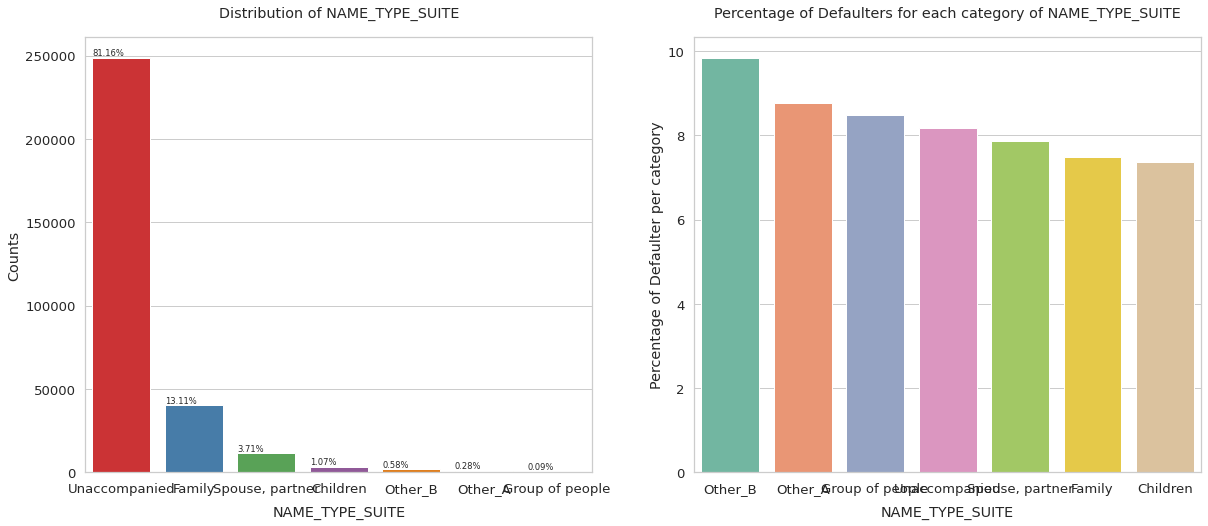

In [511]:
plot_column(data, 'NAME_TYPE_SUITE', ['bar'])

In [512]:
nameTypeSuiteMappings = {
    "Other_A": np.NaN,
    "Other_B": np.NaN,
    "Group of people": np.NaN,
    "Children": "Family",
    "Spouse, partner": "Family",
    
}

for key, val in nameTypeSuiteMappings.items():
    data_categorical['NAME_TYPE_SUITE'] = np.where(data_categorical['NAME_TYPE_SUITE'] == key, val, data_categorical['NAME_TYPE_SUITE'])

data_categorical['NAME_TYPE_SUITE'].value_counts()

/tmp/ipykernel_9930/248658061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical['NAME_TYPE_SUITE'] = np.where(data_categorical['NAME_TYPE_SUITE'] == key, val, data_categorical['NAME_TYPE_SUITE'])


Unaccompanied    248526
Family            54786
Name: NAME_TYPE_SUITE, dtype: int64

Total Number of unique categories of NAME_TYPE_SUITE = 3


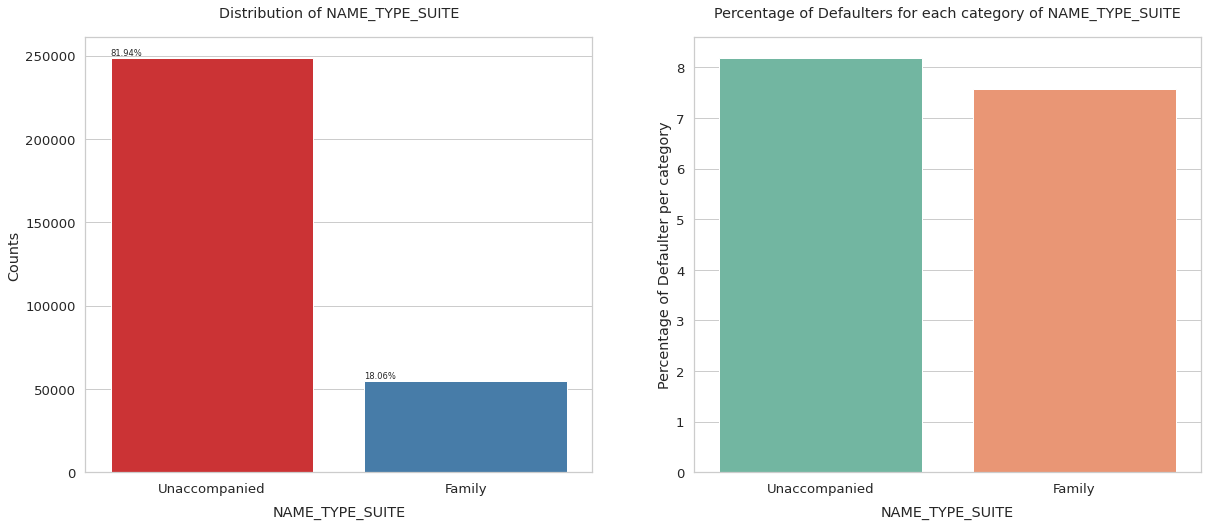

In [513]:
data3 = data
data3['NAME_TYPE_SUITE'] = data_categorical['NAME_TYPE_SUITE']

plot_column(data3, 'NAME_TYPE_SUITE', ['bar'])

#### NAME_INCOME_TYPE

In [514]:
data_categorical['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Total Number of unique categories of NAME_INCOME_TYPE = 8


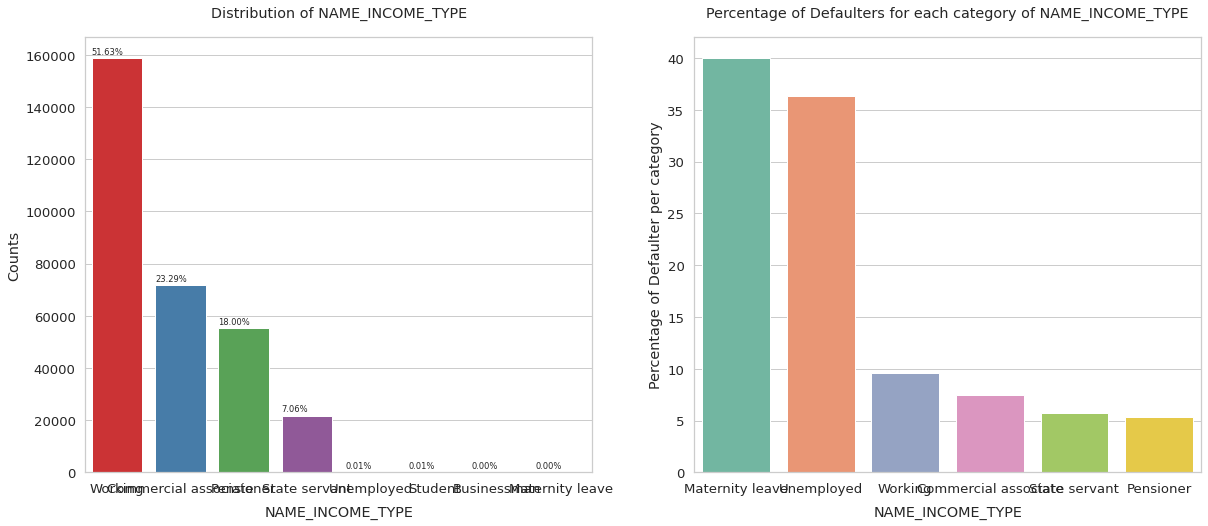

In [515]:
plot_column(data, 'NAME_INCOME_TYPE', ['bar'])

In [516]:
nameIncomeTypeMappings = {
    'Maternity leave': np.NaN,
    'Businessman': np.NaN,
    'Student': np.NaN,
    'Unemployed': np.NaN,
    'Commercial associate': 'Working',
    'State servant' : "Responsible",
    'Pensioner': "Responsible"
}

for key, val in nameIncomeTypeMappings.items():
    data_categorical['NAME_INCOME_TYPE'] = np.where(data_categorical['NAME_INCOME_TYPE'] == key, 
                                                    val,
                                                    data_categorical['NAME_INCOME_TYPE'])
    
data_categorical['NAME_INCOME_TYPE'].value_counts()

/tmp/ipykernel_9930/2363609026.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical['NAME_INCOME_TYPE'] = np.where(data_categorical['NAME_INCOME_TYPE'] == key,


Working        230391
Responsible     77065
Name: NAME_INCOME_TYPE, dtype: int64

Total Number of unique categories of NAME_INCOME_TYPE = 3


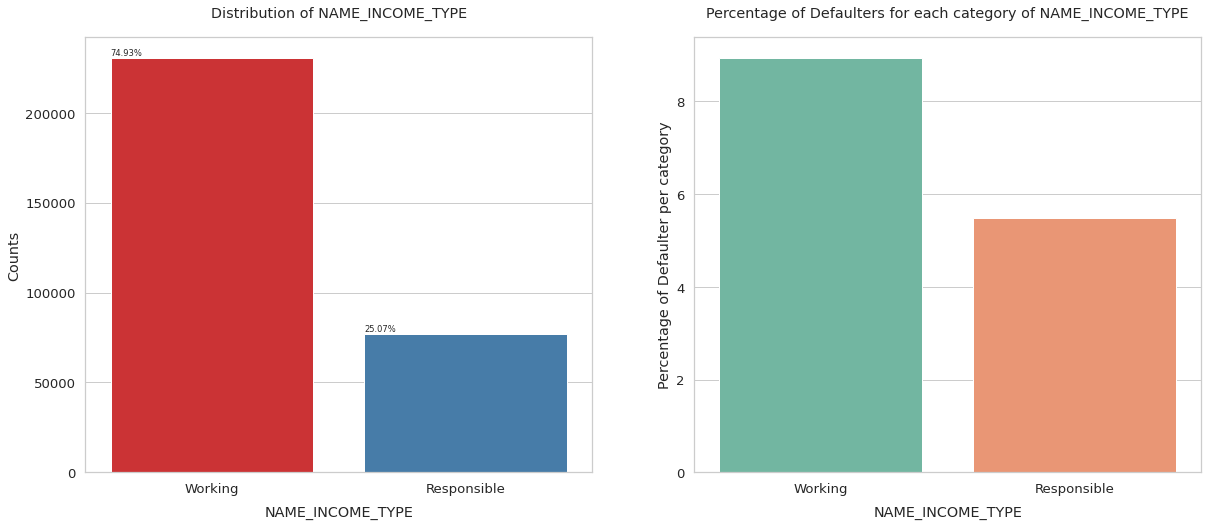

In [517]:
data3['NAME_INCOME_TYPE'] = data_categorical['NAME_INCOME_TYPE']
plot_column(data3, 'NAME_INCOME_TYPE', ['bar'])

#### NAME_EDUCATION_TYPE

In [518]:
data_categorical['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Total Number of unique categories of NAME_EDUCATION_TYPE = 5


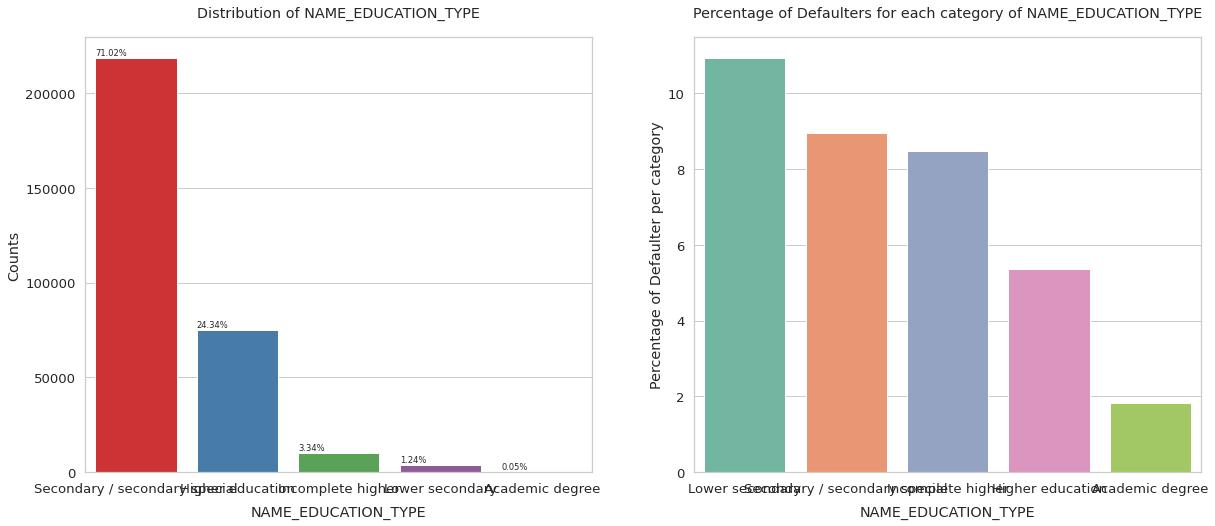

In [519]:
plot_column(data, 'NAME_EDUCATION_TYPE', ['bar'])

In [520]:
nameEducationTypeMappings = {
    'Secondary / secondary special' : 'Secondary',
    'Higher Education' : 'Higher',
    'Incomplete higher' : 'Secondary',
    'Lower secondary' : 'Secondary',
    'Academic degree' : np.NaN
}

for key, val in nameEducationTypeMappings.items():
    data_categorical['NAME_EDUCATION_TYPE'] = np.where(data_categorical['NAME_EDUCATION_TYPE'] == key,
                                                        val,
                                                        data_categorical['NAME_EDUCATION_TYPE'])
    
data_categorical['NAME_EDUCATION_TYPE'].value_counts()

/tmp/ipykernel_9930/3660949569.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical['NAME_EDUCATION_TYPE'] = np.where(data_categorical['NAME_EDUCATION_TYPE'] == key,


Secondary           232484
Higher education     74863
Name: NAME_EDUCATION_TYPE, dtype: int64

Total Number of unique categories of NAME_EDUCATION_TYPE = 3


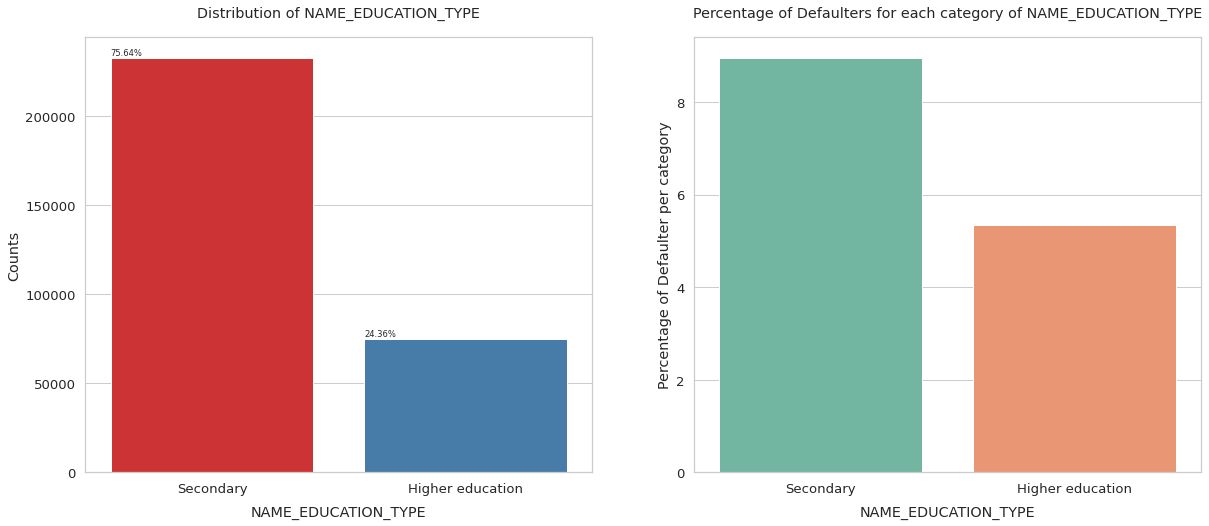

In [521]:
data3['NAME_EDUCATION_TYPE'] = data_categorical['NAME_EDUCATION_TYPE']

plot_column(data3, 'NAME_EDUCATION_TYPE', ['bar'])

#### NAME_HOUSING_TYPE

In [522]:
data_categorical['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

Total Number of unique categories of NAME_HOUSING_TYPE = 6


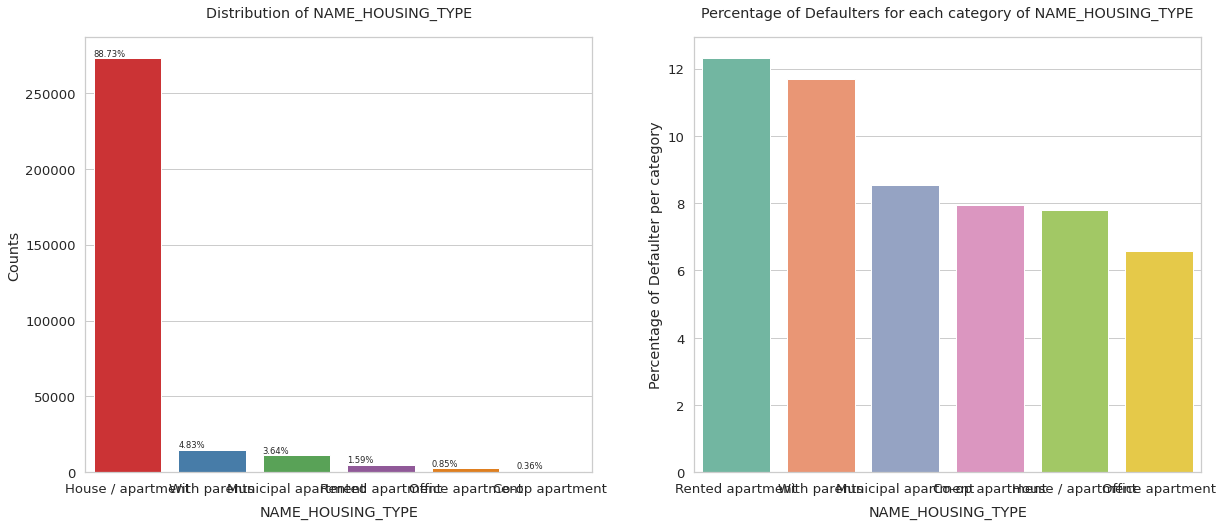

In [523]:
plot_column(data, 'NAME_HOUSING_TYPE', ['bar'])

##### Removing NAME_HOUSING_TYPE
Looking at the distribution, it's quite unlikely that we will be able to aggregate these categories into anythnig usable with statistical significance. Here the added dimensionality should simply be taken out for how disproportionate the distribution is. 

In [524]:
data_categorical.drop('NAME_HOUSING_TYPE', axis = 1, inplace = True)
len(data_categorical.columns)

/tmp/ipykernel_9930/2425491420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical.drop('NAME_HOUSING_TYPE', axis = 1, inplace = True)


19

### OCCUPATION_TYPE

In [525]:
data_categorical['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Total Number of unique categories of OCCUPATION_TYPE = 19


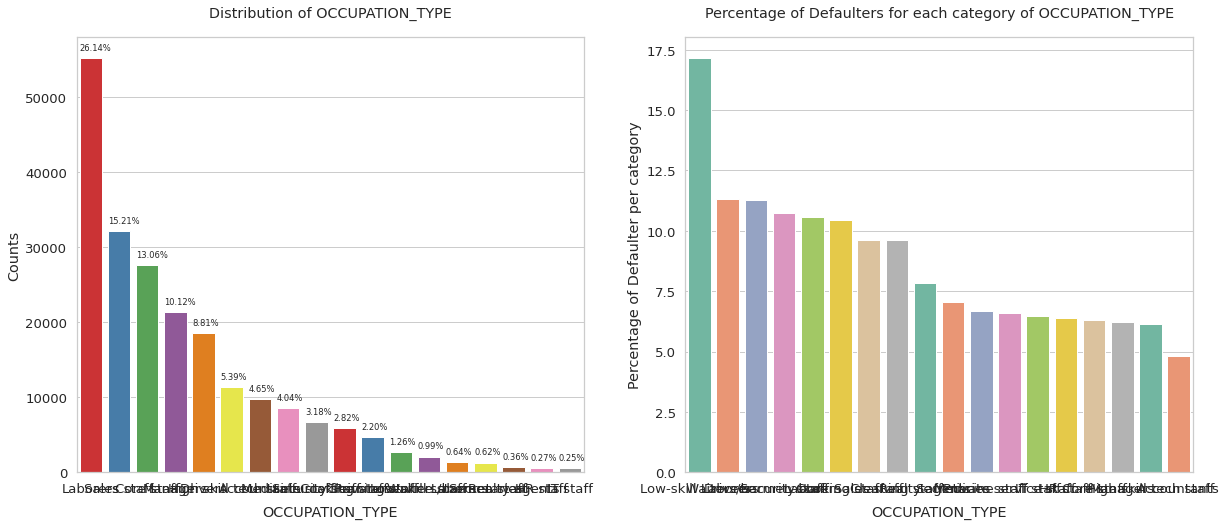

In [526]:
plot_column(data, 'OCCUPATION_TYPE', ['bar'])

In [527]:
occupationTypeMappings = {
    'High skill tech staff' : 'High Skill',
    'Laborers': 'Low Skill',
    'Sales staff': 'Low Skill',
    'Core staff': 'Low Skill',
    'Managers': 'High Skill',
    'Drivers': 'Low Skill',
    'Accountants' : 'High Skill',
    'Medicine staff': 'High Skill', # Often medical staff require credentials e.g. CNA just to do bedpans
    'Security staff': 'Low Skill',
    'Cooking staff': 'Low Skill',
    'Cleaning staff': 'Low Skill',
    'Private service staff': 'High Skill',
    'Low-skill Laborers': 'Low Skill',
    'Waiters/barmen staff': 'Low Skill',
    'Secretaries': 'Low Skill',
    'Realty agents': 'High Skill',
    'HR staff': 'High Skill',
    'IT staff': 'High Skill',
    'High SKill': 'High Skill'     # Fix typo I made more than once
}

for key, val in occupationTypeMappings.items():
    data_categorical['OCCUPATION_TYPE'] = np.where(data_categorical['OCCUPATION_TYPE'] == key,
                                                      val,
                                                      data_categorical['OCCUPATION_TYPE'])
    
data_categorical['OCCUPATION_TYPE'].value_counts()

/tmp/ipykernel_9930/3835803723.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical['OCCUPATION_TYPE'] = np.where(data_categorical['OCCUPATION_TYPE'] == key,


Low Skill     155527
High Skill     55593
Name: OCCUPATION_TYPE, dtype: int64

Total Number of unique categories of OCCUPATION_TYPE = 3


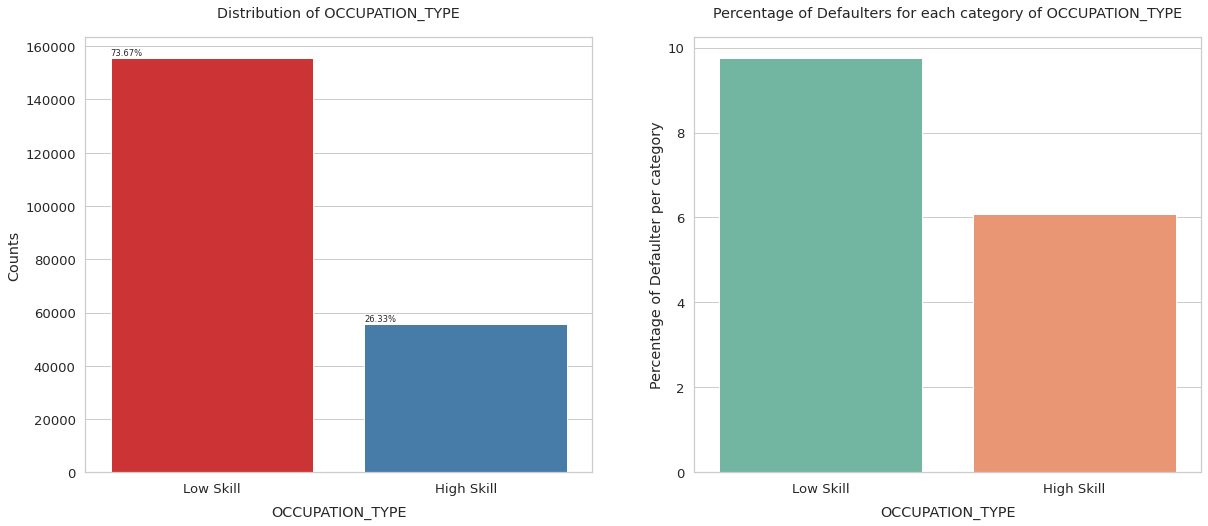

In [528]:
data3['OCCUPATION_TYPE'] = data_categorical['OCCUPATION_TYPE']
plot_column(data3, 'OCCUPATION_TYPE', ['bar'])

### Verifying No Extremely-Imbalanced Data Categories Remain
The below snippet should describe information on the extremely-imbalanced categorical data

In [529]:
mild = {}
moderate = {}
extreme = {}

# Calls helper function at top of the block to allocate mappings
allocateSeverity(data_categorical, mild, moderate, extreme)

# Prints information from which categories are extreme, moderate, and mild with imbalances
if len(extreme.keys()) > 0:
    print(len(extreme.keys()),"Extreme items: ")
else:
    print("There are no extreme items remaining in the categorical data frame")
for key, value in extreme.items():
    print(lineString)
    print("Variable: ", key)
    printCategoryDetails(extreme[key])

There are no extreme items remaining in the categorical data frame


In [530]:
# Prints information from which categories are extreme, moderate, and mild with imbalances
if len(moderate.keys()) > 0:
    print(len(moderate.keys()),"Moderate items: ")
else:
    print("There are no extreme items remaining in the categorical data frame")
for key, value in moderate.items():
    print(lineString)
    print("Variable: ", key)
    printCategoryDetails(moderate[key])

12 Moderate items: 
********************************************************************************
Variable:  FLAG_EMP_PHONE
1.0 252125  Weight on dataset:  0.8198893698111612
0.0 55386  Weight on dataset:  0.18011063018883877
********************************************************************************
Variable:  LIVE_CITY_NOT_WORK_CITY
0.0 252296  Weight on dataset:  0.8204454474799275
1.0 55215  Weight on dataset:  0.17955455252007246
********************************************************************************
Variable:  NAME_CONTRACT_TYPE
Cash loans 278232  Weight on dataset:  0.9047871458256778
Revolving loans 29279  Weight on dataset:  0.09521285417432222
********************************************************************************
Variable:  REGION_RATING_CLIENT
2.0 226984  Weight on dataset:  0.7381329448377456
3.0 48330  Weight on dataset:  0.1571651095407969
1.0 32197  Weight on dataset:  0.10470194562145745
********************************************************

#### Removing FLAG_EMP_PHONE
The employee phone flag is borderline severly imbalanced, and its correlations with the target variable are likely limited to showing high-skill employment status (low-skill laborers, commercial associates, etc. will almost never have employee phone numbers whereas IT, HR, etc. will). It's likely we can simply remove this variable to clean the dataset and reduce dimensioality. 

In [531]:
if 'FLAG_EMP_PHONE' in data_categorical.columns:
    data_categorical.drop('FLAG_EMP_PHONE', axis = 1, inplace = True)
len(data_categorical.columns)

/tmp/ipykernel_9930/1692537016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical.drop('FLAG_EMP_PHONE', axis = 1, inplace = True)


18

#### Removing REGION_RATING_CLIENT
In the data analysis secion we covered the relatively low value of this variable which is well-covered by statistics on home value and pospulation densities (rural vs. city), and the ethical risks associated by rating particular regions. As a result, we will reduce dimensionality and remove it from our dataset. Additionally, it is fairly imbalanced as most clients get a regional rating of 2 - and credit score has a stronger correlation with regional ratings of 1 and 3 as well.

In [532]:
if 'REGION_RATING_CLIENT' in data_categorical.columns:
    data_categorical.drop('REGION_RATING_CLIENT', axis = 1, inplace = True)
len(data_categorical.columns)

/tmp/ipykernel_9930/1084806836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical.drop('REGION_RATING_CLIENT', axis = 1, inplace = True)


17

#### REGION_RATING_CLIENT_W_CITY\
This variable has some fairly imbalanced distributions which will need to be accounted for along with the ethical factors associated with the variable. At the least some oversampling and weighting will need to be performed in order to remove bias from this variable. 

Total Number of unique categories of REGION_RATING_CLIENT_W_CITY = 3


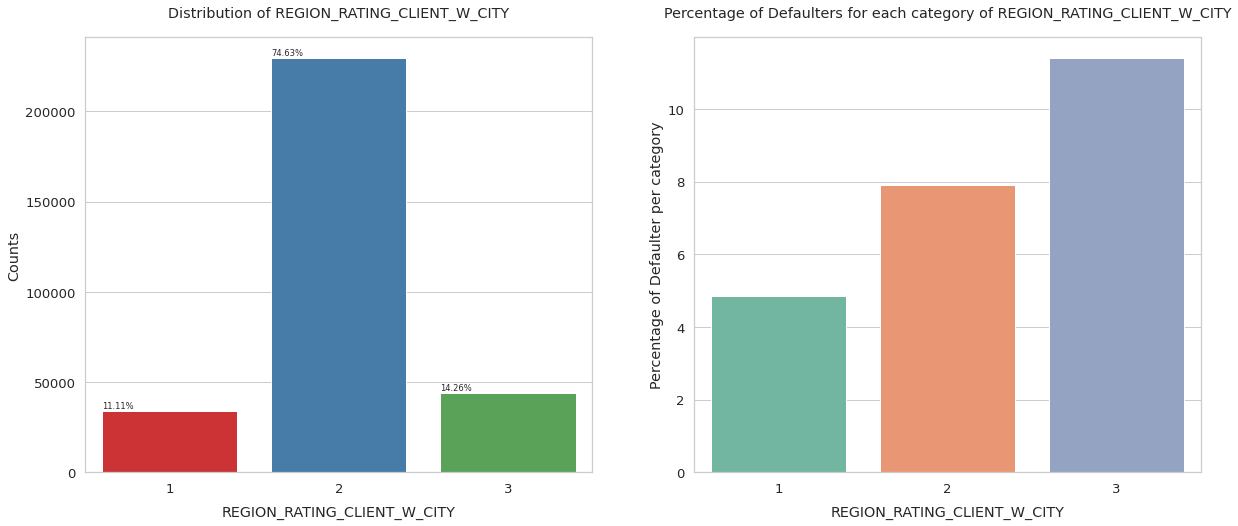

In [533]:
plot_column(data, 'REGION_RATING_CLIENT_W_CITY', ['bar'])

### Encoding Categorical Variables

In [534]:
for i in data_categorical.columns:
    # Encode categorical variable
    dummies = pd.get_dummies(data_categorical[i], drop_first = True)
    for j in dummies.columns:
        # Naming convention is <original_column_name>_<category_name>
        columnName = i+"_"+str(j).split('.')[0]
        data_categorical[columnName] = dummies[j]
        # Break if our encoded column isn't correctly added to the data frame
        assert(columnName in data_categorical.columns)

/tmp/ipykernel_9930/644313609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical[columnName] = dummies[j]
/tmp/ipykernel_9930/644313609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical[columnName] = dummies[j]
/tmp/ipykernel_9930/644313609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

## Combining Categorical Variables Back into Data Frame

In [535]:
data4 = data_categorical.copy()

for i in data2.columns:
    # We dropped original non-encoded columns: don't add them back
    if i not in data4.columns and i not in ordinalColumns:
        data4[i] = data2[i]
        
data4.shape

(307511, 119)

In [536]:
for i in data4.select_dtypes('object'):
    # Encode categorical variable
    dummies = pd.get_dummies(data4[i], drop_first = True)
    for j in dummies.columns:
        # Naming convention is <original_column_name>_<category_name>
        columnName = i+"_"+str(j).split('.')[0]
        data4[columnName] = dummies[j]
        # Break if our encoded column isn't correctly added to the data frame
        assert(columnName in data4.columns)
        
data4.drop(data4.select_dtypes('object'), axis = 1, inplace = True)

/tmp/ipykernel_9930/2913798118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data4[columnName] = dummies[j]
/tmp/ipykernel_9930/2913798118.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data4[columnName] = dummies[j]


In [537]:
data4.describe()

,FLAG_DOCUMENT_3,LIVE_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3_1,LIVE_CITY_NOT_WORK_CITY_1,NAME_CONTRACT_TYPE_Revolving loans,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.710023,0.179555,0.015144,2.031521,0.040659,0.078173,0.230454,0.710023,0.179555,0.095213,...,0.007000,0.034362,0.267395,0.265474,1.899974,0.887344,0.036366,0.008510,0.015873,0.048258
std,0.453752,0.383817,0.122126,0.502737,0.197499,0.268444,0.421124,0.453752,0.383817,0.293509,...,0.110757,0.204685,0.916002,0.794056,1.869295,0.316173,0.187200,0.091858,0.124983,0.214312
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,8.000000,27.000000,261.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [538]:
data4.shape

(307511, 113)

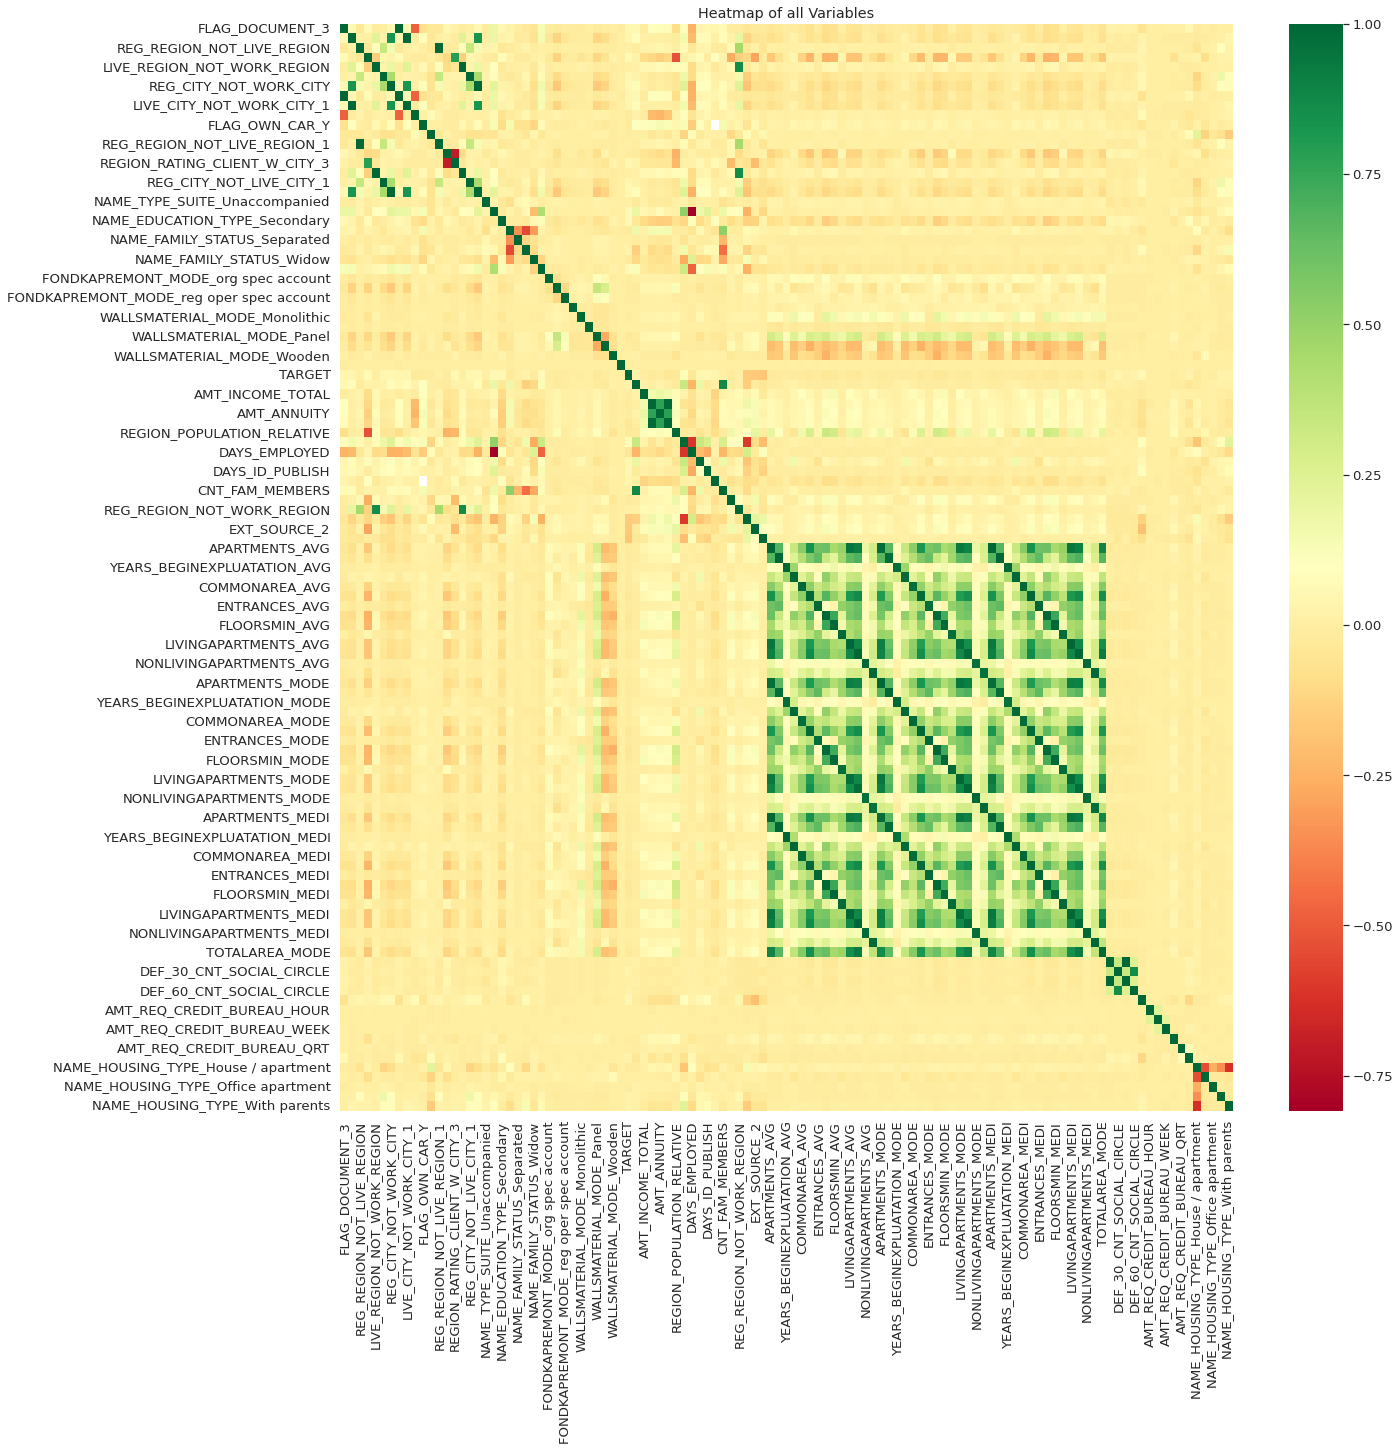

In [539]:
# Shows heatmap of all variables in data frame argument
#
# Parameters:
# -----------
# @param data:   dataframe used for heatmap display
#
# Returns
# ---------
# None
#
def showHeatmap(data):
    corrmat = data.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    plt.title("Heatmap of all Variables")
    #plot heat map
    g=sns.heatmap(data[top_corr_features].corr(),cmap="RdYlGn")
    plt.show()
    
showHeatmap(data4)

In [540]:
df4_corr = data4.corr()['TARGET']
golden_features_list = df4_corr[abs(df4_corr) > 0.01].sort_values(ascending=False)
print("There are {} strongly correlated values with TARGET:\n{}".format(len(golden_features_list)-1, golden_features_list[1:]))

There are 82 strongly correlated values with TARGET:
DAYS_BIRTH                       0.078239
OCCUPATION_TYPE_Low Skill        0.062376
REGION_RATING_CLIENT_W_CITY      0.060893
NAME_EDUCATION_TYPE_Secondary    0.056835
DAYS_LAST_PHONE_CHANGE           0.055218
                                   ...   
FLOORSMAX_AVG                   -0.044003
DAYS_EMPLOYED                   -0.044932
EXT_SOURCE_1                    -0.155317
EXT_SOURCE_2                    -0.160472
EXT_SOURCE_3                    -0.178919
Name: TARGET, Length: 82, dtype: float64


In [541]:
data4.dtypes

FLAG_DOCUMENT_3                          float64
LIVE_CITY_NOT_WORK_CITY                  float64
REG_REGION_NOT_LIVE_REGION               float64
REGION_RATING_CLIENT_W_CITY              float64
LIVE_REGION_NOT_WORK_REGION              float64
                                          ...   
NAME_HOUSING_TYPE_House / apartment        uint8
NAME_HOUSING_TYPE_Municipal apartment      uint8
NAME_HOUSING_TYPE_Office apartment         uint8
NAME_HOUSING_TYPE_Rented apartment         uint8
NAME_HOUSING_TYPE_With parents             uint8
Length: 113, dtype: object

### K-Means

#### Preparing Data Frame
Here the data frame is copied, null values are removed, and the features are scaled.

In [542]:
for col in data4.columns:
    if data4[col].isnull().sum() > 0:
        print(col, ": ", data4[col].isnull().sum())

AMT_ANNUITY :  12
AMT_GOODS_PRICE :  278
OWN_CAR_AGE :  202929
CNT_FAM_MEMBERS :  2
EXT_SOURCE_1 :  173378
EXT_SOURCE_2 :  660
EXT_SOURCE_3 :  60965
APARTMENTS_AVG :  156061
BASEMENTAREA_AVG :  179943
YEARS_BEGINEXPLUATATION_AVG :  150007
YEARS_BUILD_AVG :  204488
COMMONAREA_AVG :  214865
ELEVATORS_AVG :  163891
ENTRANCES_AVG :  154828
FLOORSMAX_AVG :  153020
FLOORSMIN_AVG :  208642
LANDAREA_AVG :  182590
LIVINGAPARTMENTS_AVG :  210199
LIVINGAREA_AVG :  154350
NONLIVINGAPARTMENTS_AVG :  213514
NONLIVINGAREA_AVG :  169682
APARTMENTS_MODE :  156061
BASEMENTAREA_MODE :  179943
YEARS_BEGINEXPLUATATION_MODE :  150007
YEARS_BUILD_MODE :  204488
COMMONAREA_MODE :  214865
ELEVATORS_MODE :  163891
ENTRANCES_MODE :  154828
FLOORSMAX_MODE :  153020
FLOORSMIN_MODE :  208642
LANDAREA_MODE :  182590
LIVINGAPARTMENTS_MODE :  210199
LIVINGAREA_MODE :  154350
NONLIVINGAPARTMENTS_MODE :  213514
NONLIVINGAREA_MODE :  169682
APARTMENTS_MEDI :  156061
BASEMENTAREA_MEDI :  179943
YEARS_BEGINEXPLUATATION_MED

In [543]:
df_num = data4.copy()
df_num.dropna(inplace = True)

##### Exploring Cleaned Data Frame
It is important to validate the integrity of the data frame before putting it into a model that is used for metrics.

In [544]:
df_num.describe()

,FLAG_DOCUMENT_3,LIVE_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REGION_RATING_CLIENT_W_CITY,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3_1,LIVE_CITY_NOT_WORK_CITY_1,NAME_CONTRACT_TYPE_Revolving loans,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
count,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,...,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000
mean,0.644084,0.125628,0.013831,1.942648,0.051802,0.035856,0.139635,0.644084,0.125628,0.106510,...,0.007136,0.039292,0.368602,0.259272,1.762840,0.892344,0.029689,0.012422,0.010924,0.050216
std,0.478811,0.331444,0.116796,0.554331,0.221636,0.185939,0.346623,0.478811,0.331444,0.308503,...,0.100405,0.207879,1.063689,0.596758,1.776141,0.309959,0.169735,0.110764,0.103951,0.218400
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,17.000000,8.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [545]:
df_num.shape

(11351, 113)

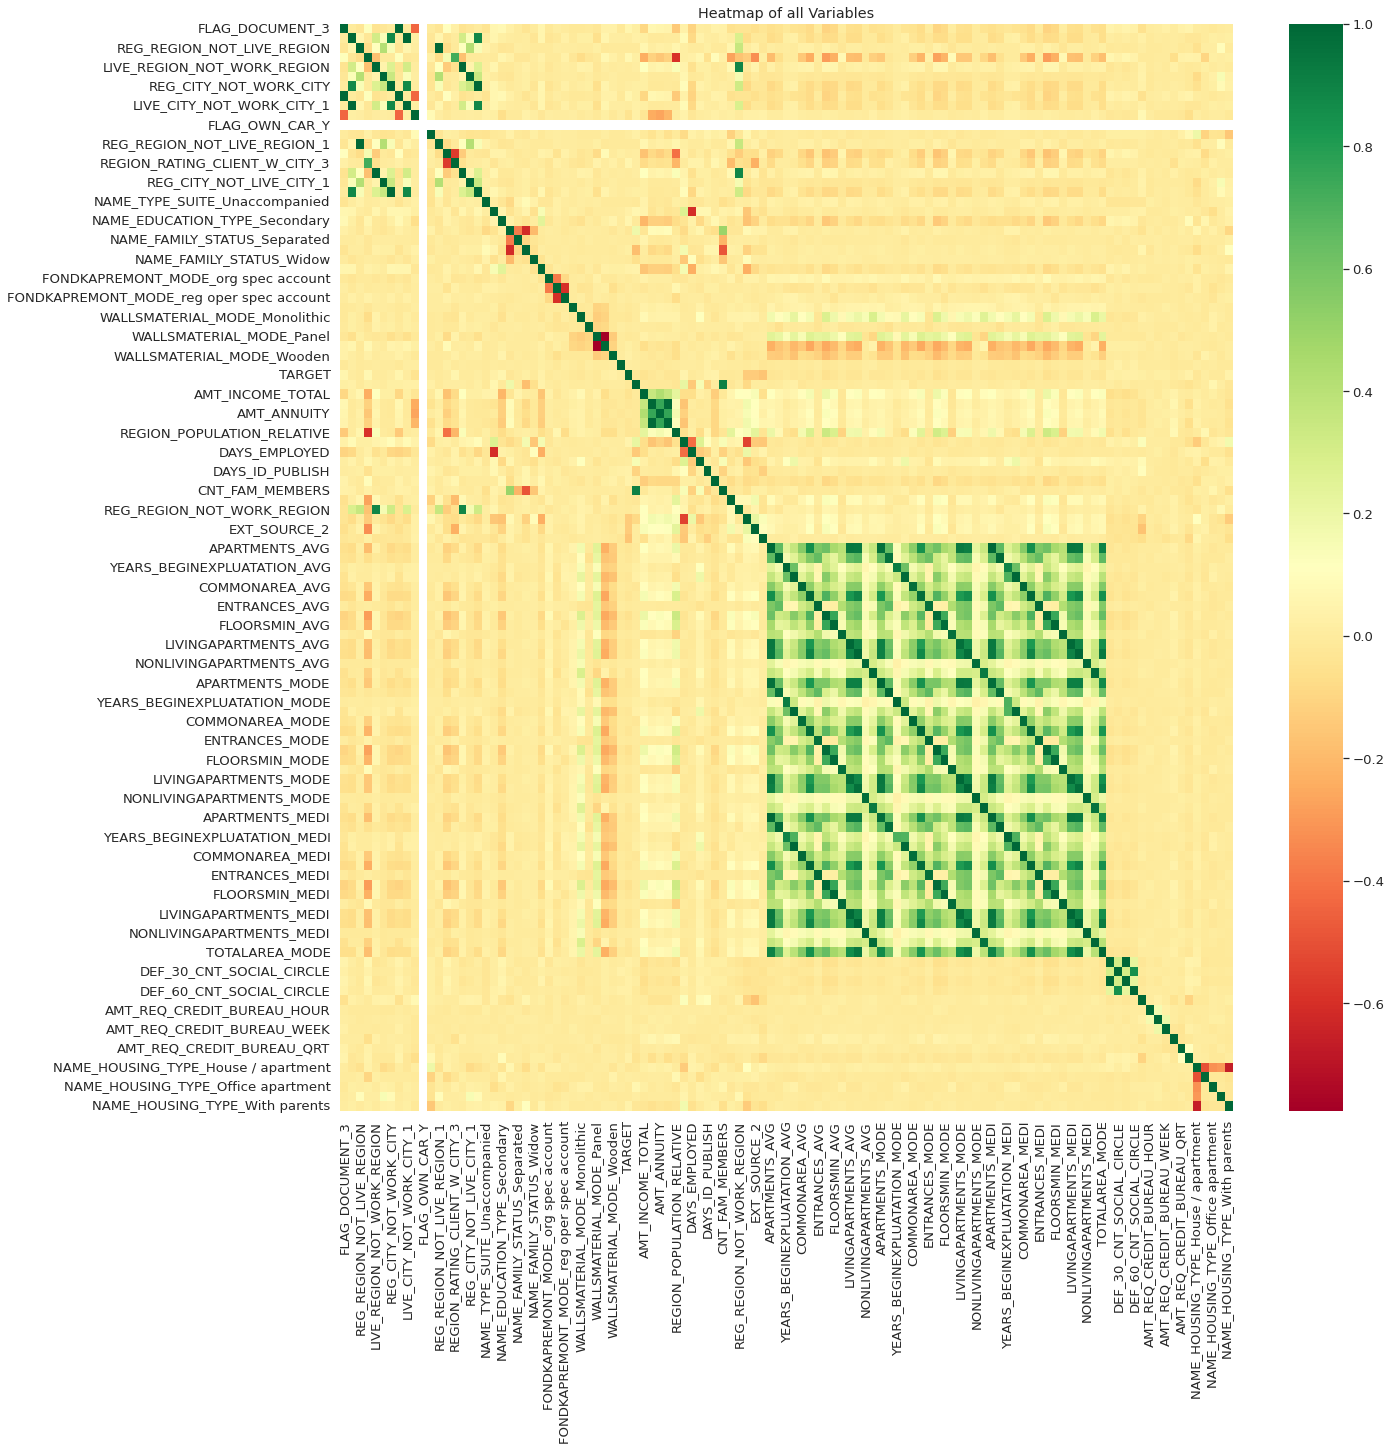

In [546]:
showHeatmap(df_num)

## GBT

In [547]:
# Import GBT Libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

#### Creating Baseline for GBT
Below we perform minimal cleaning to fit the baseline in a data frame for performance improvement metrics.

In [548]:
# Copy original data frame for minimal cleaning
dataBaseline = data.copy()

if 'FONDKAPREMONT_MODE' not in ordinalColumns:
    ordinalColumns.append('FONDKAPREMONT_MODE')

# Columns to add to ordinal data that may have slipped through the cracks for baseline data frame
otherPossibleColumns = [
    'FONDKAPREMONT_MODE',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE'
]

# Determine categorical columns to evaluate
ordinalBaselineColumns = []
for i in ordinalColumns:
    if i in dataBaseline.columns:
        ordinalBaselineColumns.append(i)

# Add sneaky columns that slip through cracks.
for i in otherPossibleColumns:
    if i not in ordinalBaselineColumns and i in dataBaseline.columns:
        ordinalBaselineColumns.append(i)

# Encode categorical columns
dummies = pd.get_dummies(dataBaseline[ordinalBaselineColumns], drop_first=True)

# probably better to do pd.concat, but performance can be improved later
for i in dummies:
    dataBaseline[i] = dummies[i]

# Remove object type columns now
dataBaseline.drop(ordinalBaselineColumns, axis = 1, inplace = True)

/tmp/ipykernel_9930/1970583767.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataBaseline[i] = dummies[i]
/tmp/ipykernel_9930/1970583767.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataBaseline[i] = dummies[i]
/tmp/ipykernel_9930/1970583767.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

In [549]:
print(dataBaseline.select_dtypes(include = ['object']).columns)

assert(len(dataBaseline.select_dtypes(include = ['object']).columns) == 0)
dataBaseline.shape

Index([], dtype='object')


(307511, 167)

##### Removing all Null Values from Baseline Data Frame

In [550]:
dataBaseline.dropna(inplace = True)
dataBaseline.dropna(inplace = True, axis = 1, how = 'all')

for col in dataBaseline.columns:
    if dataBaseline[col].isnull().sum() > 0:
        print(col, dataBaseline[col].isnull().sum())

##### Splitting Baseline Testing and Training

In [551]:
thresholdBaseline = int(dataBaseline.shape[0]*.7)

X_train_baseline = dataBaseline.values[0: thresholdBaseline]
X_test_baseline = dataBaseline.values[thresholdBaseline:]

y_train_baseline = dataBaseline['TARGET'].values[0: thresholdBaseline]
y_test_baseline = dataBaseline['TARGET'].values[thresholdBaseline]

In [552]:
scaler = MinMaxScaler()
X_train_baseline = scaler.fit_transform(X_train_baseline)
X_test_baseline = scaler.transform(X_test_baseline)
# No need to transform categorical target variable

# Break before trying to put arrays into model
assert(len(y_train_baseline) == len(X_train_baseline))

print(len(y_train_baseline))
print(len(X_train_baseline))

7945
7945


In [553]:
state = 12
test_size = 0.30

X_train_baseline, X_val_baseline, y_train_baseline, y_val_baseline = train_test_split(X_train_baseline,
                                                                                      y_train_baseline,
                                                                                      test_size = test_size,
                                                                                      random_state = state)


In [554]:
optimalLearningRate = 0.5

lr_list = [optimalLearningRate]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_baseline, y_train_baseline)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_baseline, y_train_baseline)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val_baseline, y_val_baseline)))


Learning rate:  0.5
Accuracy score (training): 0.942
Accuracy score (validation): 0.939


In [555]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train_baseline, y_train_baseline)
predictions = gb_clf2.predict(X_val_baseline)

print("Confusion Matrix:")
print(confusion_matrix(y_val_baseline, predictions))

print("Classification Report")
print(classification_report(y_val_baseline, predictions))

Confusion Matrix:
[[2237    4]
 [ 141    2]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2241
           1       0.33      0.01      0.03       143

    accuracy                           0.94      2384
   macro avg       0.64      0.51      0.50      2384
weighted avg       0.90      0.94      0.91      2384



In [556]:
# 70% Test Training Split for labelled data
threshold = int(df_num.shape[0]*.7)

X_train = df_num.values[0:threshold]
X_test = df_num.values[threshold:]

In [557]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = df_num['TARGET'].values[0:threshold]
y_test = df_num['TARGET'].values[threshold:]

print(len(y_train))
print(len(X_train))

7945
7945


In [558]:
state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

In [559]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Overwrite the list with our favored learning rate after we have analyzed various values
optimalLearningRate = 0.5
lr_list = [optimalLearningRate]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.5
Accuracy score (training): 0.943
Accuracy score (validation): 0.940


In [560]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[2239    2]
 [ 142    1]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2241
           1       0.33      0.01      0.01       143

    accuracy                           0.94      2384
   macro avg       0.64      0.50      0.49      2384
weighted avg       0.90      0.94      0.91      2384



In [561]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler # Used for standardizing data for PCA and K-means clustering

# For visualization of how many clusters to go with and saving runtime we threshold
maxClusters = 20
initializationType = "k-means++"

# If we are skipping the plotting & analytics, simply create our clustering with best found value
chosenOptimalClusters = 4

# K-means has difficulty computing distance with different scaling - this normalizes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_num)
        
# Performs 10 runs of K-means algorithm with 3 clusters and maximum of 300 iterations.
kmeansArgs = {
    "init" : initializationType,   # Both have been tried - optimal to intelligently initialize centroids
    "n_init" : 1,                  # Performs 10 runs
    "max_iter" : 15,              # At most 300 iterations - usually doesn't go through too many
    "random_state" : 42
}

# After visualization we save our k-means data structure with optimal number of clusters
kmeans = KMeans(n_clusters=chosenOptimalClusters, **kmeansArgs)
y_predict= kmeans.fit_predict(scaled_features) 

In [562]:
analyzeClusters = False

# Compute and plot k-means cluster analysis
if analyzeClusters:
    # K-means metric lists
    # Sum of Squares error for Euclidean distance
    sse = []
    # How well data point fits inside its own cluster and how far it is from other clusters
    silhouetteCoefficients = []
    # Run k-means parameters with various numbers of clusters and obtain metrics
    for k in range(1, maxClusters+1):
        kmeans = KMeans(n_clusters=k, **kmeansArgs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)
        # Silhouette Score needs at least two clusters to run
        if k > 1:
            score = silhouette_score(scaled_features, kmeans.labels_)
            silhouetteCoefficients.append(score)
    # Create a nice folder to store the plots, if necessary
    path = "images/k_means/" + initializationType
    if not os.path.exists(path):
        os.mkdir(path)
    # Plot SSE as function of number of clusters
    plt.plot(range(0, len(sse)), sse)
    plt.xticks(range(0, len(sse)+1))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.savefig(path + "/sse_to_clusters.png")
    plt.clf()
    # Plot silhouette coefficients as function of number of clusters
    plt.plot(range(0, len(silhouetteCoefficients)), silhouetteCoefficients)
    plt.xticks(range(0, len(silhouetteCoefficients)+1))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficients")
    plt.savefig(path + "/silhouette_cofefficients_to_clusters.png")
    plt.clf()
    # Debugging output
    if debug == True:
        print("K-means cluster plots...success")
elif debug == True:
        print("Save plots off: skipping K-means cluster plots")

Save plots off: skipping K-means cluster plots


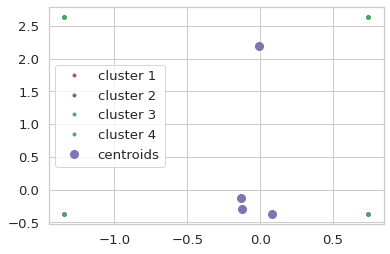

In [563]:
kmeans.fit(scaled_features)
centroids = kmeans.cluster_centers_
labels= kmeans.labels_

plt.figure()
plt.plot(scaled_features[labels==0,0],scaled_features[labels==0,1],'r.', label='cluster 1')
plt.plot(scaled_features[labels==1,0],scaled_features[labels==1,1],'b.', label='cluster 2')
plt.plot(scaled_features[labels==2,0],scaled_features[labels==2,1],'g.', label='cluster 3')
plt.plot(scaled_features[labels==3,0],scaled_features[labels==3,1],'g.', label='cluster 4')


plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=8, label='centroids')

plt.legend(loc='best')
plt.show()

In [564]:
y_predict
kmeans.predict(scaled_features)

array([1, 3, 3, ..., 3, 3, 3], dtype=int32)

In [565]:
print(len(y_predict))
print(df_num.shape[0])

11351
11351


In [566]:
df_num['TARGET']

71        0
124       0
143       0
152       0
161       0
         ..
307359    0
307363    1
307407    1
307456    0
307482    0
Name: TARGET, Length: 11351, dtype: int64

In [567]:
from sklearn.metrics import accuracy_score

# Compute the accuracy
accuracy_score(y_predict, df_num['TARGET'])

0.07303321293278126